In [2]:
import torch
print(torch.cuda.is_available())

True


In [3]:
from google.colab import files
uploaded = files.upload()


Saving AEP_hourly.csv to AEP_hourly.csv


The dataset, available from Kaggle, contains hourly energy consumption data. This code loads the data from a CSV file

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('./AEP_hourly.csv')
print(data.head())
print(data.info())


              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None


In [94]:
# Check for missing values
print(data.isnull().sum())

Datetime    0
AEP_MW      0
dtype: int64


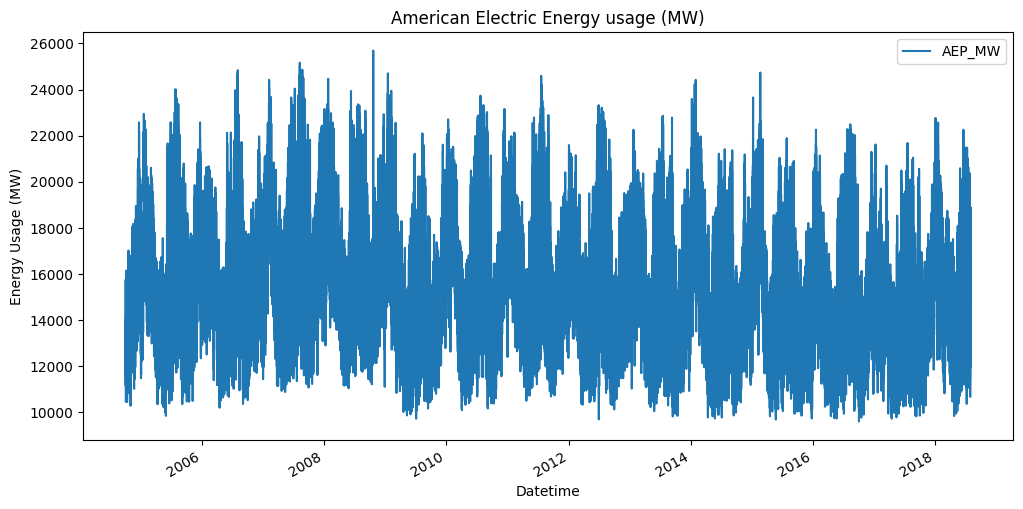

In [95]:
# Visualize the energy usage ('AEP_MW') against the date and time
data['Datetime'] = pd.to_datetime(data['Datetime'])
data = data.sort_values(by='Datetime')
data.plot(x='Datetime', y='AEP_MW', figsize=(12, 6), title='American Electric Energy usage (MW)')
plt.ylabel('Energy Usage (MW)')
plt.show()

In [96]:
# Create new columns from table
data['Hour'] = data['Datetime'].dt.hour
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year
data['Day of the Week'] = data['Datetime'].dt.day_of_week
data['Day of the Month'] = data['Datetime'].dt.day
data['Day of the Year'] = data['Datetime'].dt.day_of_year
data['Quarter'] = data['Datetime'].dt.quarter
data['Energy Consumption'] = data['AEP_MW']


In [97]:
data.head()

,Datetime,AEP_MW,Hour,Month,Year,Day of the Week,Day of the Month,Day of the Year,Quarter,Energy Consumption
2183,2004-10-01 01:00:00,12379.0,1,10,2004,4,1,275,4,12379.0
2184,2004-10-01 02:00:00,11935.0,2,10,2004,4,1,275,4,11935.0
2185,2004-10-01 03:00:00,11692.0,3,10,2004,4,1,275,4,11692.0
2186,2004-10-01 04:00:00,11597.0,4,10,2004,4,1,275,4,11597.0
2187,2004-10-01 05:00:00,11681.0,5,10,2004,4,1,275,4,11681.0


In [98]:
useful_columns = ['Hour', 'Month', 'Year', 'Day of the Week', 'Day of the Month', 'Day of the Year', 'Quarter', 'Energy Consumption']
data = data[useful_columns]

In [99]:
# One hot encoding of categorical values
data = pd.get_dummies(data, columns=['Day of the Week', 'Month'], drop_first=True)

In [100]:
data.head()

,Hour,Year,Day of the Month,Day of the Year,Quarter,Energy Consumption,Day of the Week_1,Day of the Week_2,Day of the Week_3,Day of the Week_4,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
2183,1,2004,1,275,4,12379.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2184,2,2004,1,275,4,11935.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2185,3,2004,1,275,4,11692.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2186,4,2004,1,275,4,11597.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2187,5,2004,1,275,4,11681.0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [101]:
data.columns

Index(['Hour', 'Year', 'Day of the Month', 'Day of the Year', 'Quarter',
       'Energy Consumption', 'Day of the Week_1', 'Day of the Week_2',
       'Day of the Week_3', 'Day of the Week_4', 'Day of the Week_5',
       'Day of the Week_6', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')

In [102]:
# Convert boolean encoding to numeric values
data = data.astype(int)
data.head()

,Hour,Year,Day of the Month,Day of the Year,Quarter,Energy Consumption,Day of the Week_1,Day of the Week_2,Day of the Week_3,Day of the Week_4,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
2183,1,2004,1,275,4,12379,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2184,2,2004,1,275,4,11935,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2185,3,2004,1,275,4,11692,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2186,4,2004,1,275,4,11597,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2187,5,2004,1,275,4,11681,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [103]:
# Apply normalization to numeric columns to help improve model convergence
numeric_columns = ['Hour', 'Year', 'Day of the Month', 'Day of the Year', 'Quarter', 'Energy Consumption']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [104]:
data.columns

Index(['Hour', 'Year', 'Day of the Month', 'Day of the Year', 'Quarter',
       'Energy Consumption', 'Day of the Week_1', 'Day of the Week_2',
       'Day of the Week_3', 'Day of the Week_4', 'Day of the Week_5',
       'Day of the Week_6', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')

In [105]:
# Separate output column from input columns
output = data[["Energy Consumption"]]
data = data.drop('Energy Consumption', axis=1)

data.head()

,Hour,Year,Day of the Month,Day of the Year,Quarter,Day of the Week_1,Day of the Week_2,Day of the Week_3,Day of the Week_4,Day of the Week_5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
2183,0.043478,0.0,0.0,0.750685,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2184,0.086957,0.0,0.0,0.750685,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2185,0.130435,0.0,0.0,0.750685,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2186,0.173913,0.0,0.0,0.750685,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2187,0.217391,0.0,0.0,0.750685,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [106]:
import numpy as np
# Create sequence windows. Each sequence consists of 24 time steps to represent 24 hours and the target value is the following hour
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(output.iloc[i+seq_length])  # Target is still the Energy Consumption
    return np.array(sequences), np.array(targets)

seq_length = 24
# Assuming 'data' contains all selected columns
X, y = create_sequences(data, seq_length)



In [107]:
import torch.nn as nn
# Define RNN class
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [110]:
# Split data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [111]:
import torch.optim as optim
from sklearn.model_selection import TimeSeriesSplit
from torch.utils.data import DataLoader, TensorDataset

def cross_validate(model_class, params, X, y, num_folds=5, batch_size=16):
    tscv = TimeSeriesSplit(n_splits=num_folds)
    results = []

    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Convert data to Tensor
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

        # Create DataLoader for batching
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # No shuffling for time series
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # No shuffling for time series

        # Initialize model, optimizer, and loss function
        input_size = params['input_size']
        hidden_size = params['hidden_size']
        num_layers = params['num_layers']
        lr = params['lr']
        epochs = params['epochs']

        model = model_class(input_size, hidden_size, num_layers)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        # Training loop
        print()
        for epoch in range(epochs):
            model.train()
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
            print(f"epoch {epoch+1} of {epochs} epochs, loss = {loss.item():.4f}")
        # Validation loop
        model.eval()
        with torch.no_grad():
            val_loss = 0
            for batch_X, batch_y in val_loader:
                val_outputs = model(batch_X)
                loss = criterion(val_outputs, batch_y)
                val_loss += loss.item()

        results.append(val_loss / len(val_loader))

    return sum(results) / len(results)


In [ ]:
param_grid = {
    'input_size': 22,  # Use the number of features at each time step
    'hidden_size': [32, 64, 128],
    'num_layers': [1, 2, 3],
    'lr': [0.001, 0.01],
    'epochs': 20
}

best_params = None
best_score = float('inf')

for hidden_size in param_grid['hidden_size']:
    for num_layers in param_grid['num_layers']:
        for lr in param_grid['lr']:
            params = {
                'input_size': param_grid['input_size'],
                'hidden_size': hidden_size,
                'num_layers': num_layers,
                'lr': lr,
                'epochs': param_grid['epochs']
            }

            # Use the original X_train and X_val without reshaping (since they're already in the correct format)
            print()
            print("Parameters", params)

            score = cross_validate(RNNModel, params, X_train, y_train)

            if score < best_score:
                best_score = score
                best_params = {params}

print("Best RNN Params:", best_params)



Parameters {'input_size': 22, 'hidden_size': 32, 'num_layers': 1, 'lr': 0.001, 'epochs': 20}

epoch 1 of 20 epochs, loss = 0.0083
epoch 2 of 20 epochs, loss = 0.0006
epoch 3 of 20 epochs, loss = 0.0038
epoch 4 of 20 epochs, loss = 0.0016
epoch 5 of 20 epochs, loss = 0.0027
epoch 6 of 20 epochs, loss = 0.0011
epoch 7 of 20 epochs, loss = 0.0027
epoch 8 of 20 epochs, loss = 0.0041
epoch 9 of 20 epochs, loss = 0.0016
epoch 10 of 20 epochs, loss = 0.0088


In [89]:
# Retrain on the full training + validation set
input_size = best_params['input_size']
hidden_size = best_params['hidden_size']
num_layers = best_params['num_layers']
model = RNNModel(input_size, hidden_size, num_layers)
lr = best_params['lr']
epochs = best_params['epochs']
optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])
criterion = nn.MSELoss()

# Train on the whole train + validation dataset
model.train()
for epoch in range(best_params['epochs']):
    optimizer.zero_grad()
    outputs = model(torch.tensor(X_train, dtype=torch.float32))
    loss = criterion(outputs, torch.tensor(y_train, dtype=torch.float32))
    loss.backward()
    optimizer.step()

# Test the model on the held-out test data
model.eval()
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.float32))
    test_loss = criterion(test_outputs, torch.tensor(y_test, dtype=torch.float32))

print("Test Loss:", test_loss.item())


Test Loss: 0.02008857950568199


In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = scaler.inverse_transform(test_outputs.numpy())
actual = scaler.inverse_transform(y_test)

# Compute error metrics
mae = mean_absolute_error(actual, predictions)
mape = np.mean(np.abs((actual - predictions) / actual)) * 100
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Print the metrics
print(f"MAE: {mae:.2f}, MAPE: {mape:.2f}%, RMSE: {rmse:.2f}")


MAE: 1838.26, MAPE: 13.01%, RMSE: 2283.90


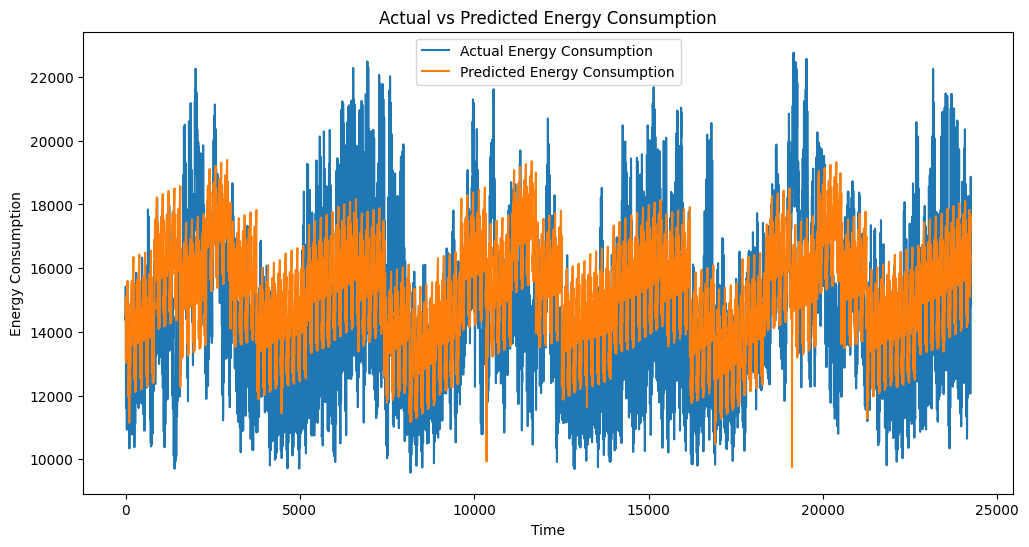

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual, label="Actual Energy Consumption")
plt.plot(predictions, label="Predicted Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.legend()
plt.show()
